<a href="https://colab.research.google.com/github/owiger-8/DataAnlaticsCourse/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

# 3
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df , value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # 6
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # 7
    sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count", height=4, aspect=.7)
    plt.show()


    # 8
    fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count", height=4, aspect=.7)
    plt.show()



    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]


    # 12
    corr = df_heat.corr()


    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))




    # 14
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})



    # 16
    fig.savefig('heatmap.png')
    return fig


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

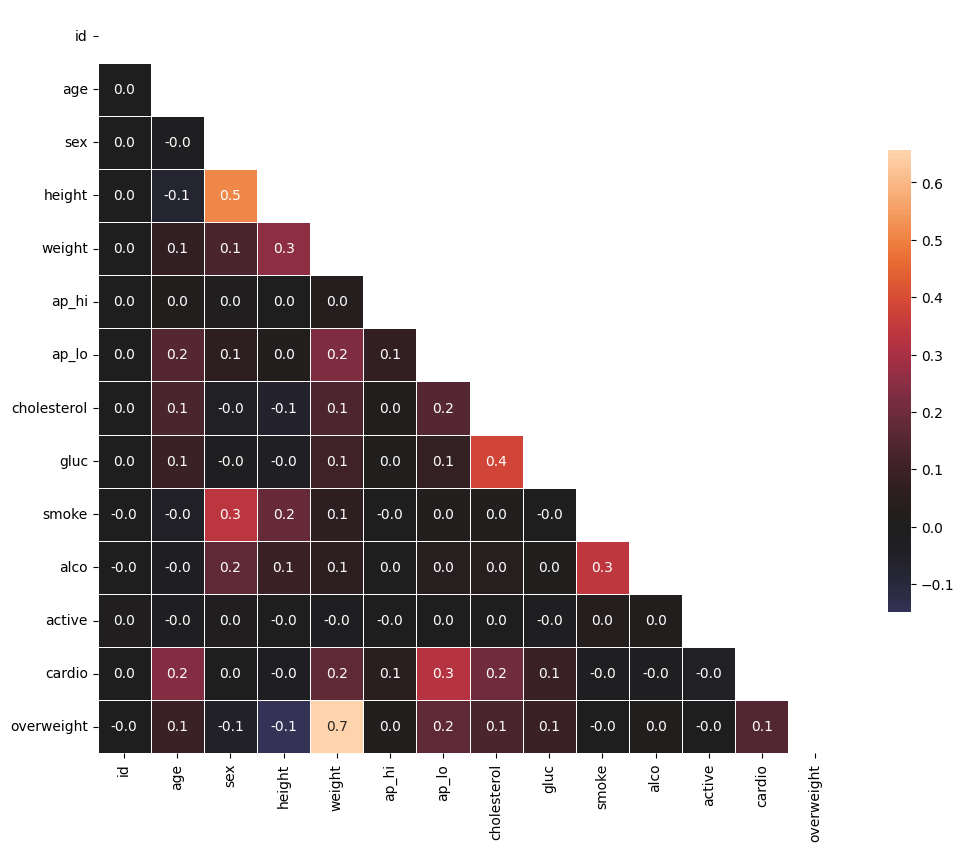

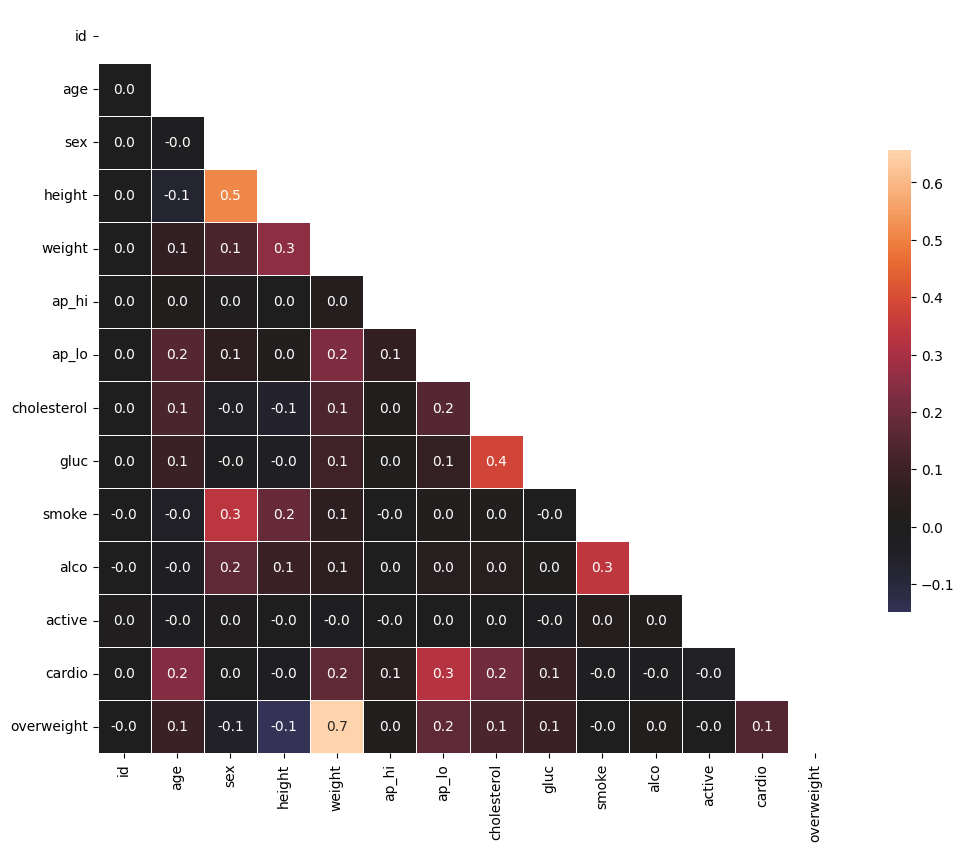

In [ ]:
draw_heat_map()

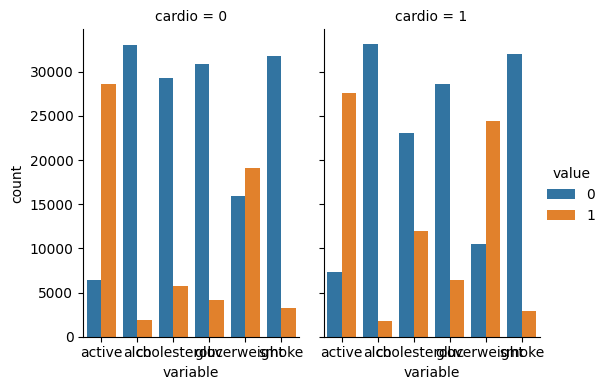

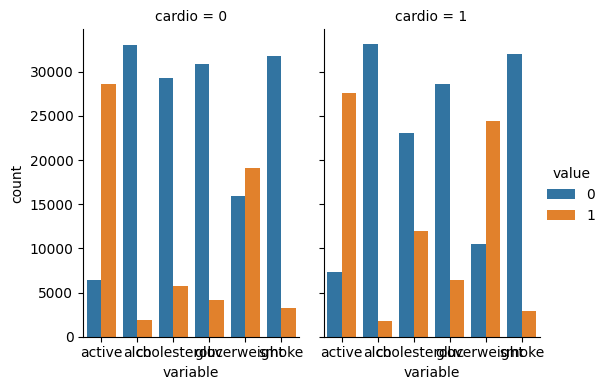

In [ ]:
draw_cat_plot()